In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
                                                name  \
0                      10-Day Green 

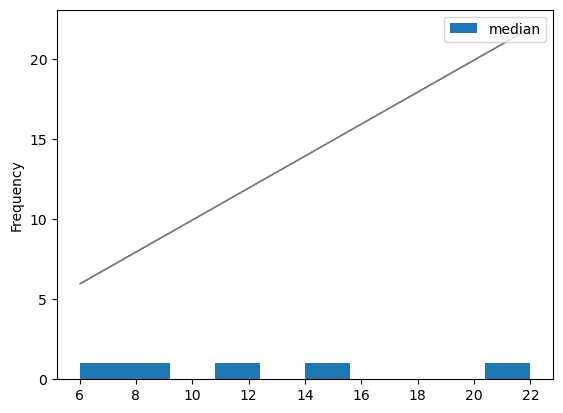

                                                          name  \
user_rating                                                      
4.6                                          11/22/63: A Novel   
4.7                                     1984 (Signet Classics)   
4.8          5,000 Awesome Facts (About Everything!) (Natio...   

                               author  reviews  price  year        genre  
user_rating                                                               
4.6                      Stephen King     2052     22  2011      Fiction  
4.7                Jordan B. Peterson    21424     15  2018  Non Fiction  
4.8          National Geographic Kids     7665     12  2019  Non Fiction  
<bound method DataFrame.count of                                                           name  \
user_rating                                                      
4.6                                          11/22/63: A Novel   
4.7                                     1984 (Signet Classics) 

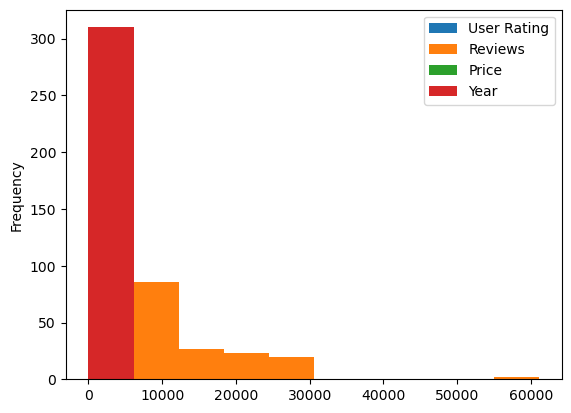

Name           12 Rules for Life: An Antidote to Chaos
Author                      Admiral William H. McRaven
User Rating                                        4.0
Reviews                                            220
Price                                                1
Year                                              2009
Genre                                      Non Fiction
dtype: object
                            Name
                           count
Author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]
                            Name
                           count
Author                          
Abraham Verghese

In [2]:
df_csv = pd.read_csv('bestsellers with categories.csv')
h5 = df_csv.head()
print(h5)

num_row = df_csv.shape
print(num_row)

h5.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df_csv.columns)
print(h5)

count_nan = h5.isnull().sum() 
print(f'кількість пропусків {count_nan}')

unik = h5.genre.unique()
print(f'Унікальні жанри в колонці genre{unik}')

df_price = h5.groupby(by=['price'],as_index=False).agg({'price':['max','min', 'median', 'mean']})
print(df_price)

data = h5.groupby(["price"],as_index=False).agg(
    min=pd.NamedAgg(column="price", aggfunc="min"),
    max=pd.NamedAgg(column="price", aggfunc="max"),
    median=pd.NamedAgg(column="price", aggfunc="median"),
    mean=pd.NamedAgg(column="price", aggfunc=np.mean))
data.reset_index(inplace=True)

ax = data.plot(x='price', y='median', kind='hist')
ax.fill_between(x='price', y1='min', y2='max', data=data,
                color=mpl.colors.to_rgba('black', 0.5))
plt.show()

r_rat = h5.groupby(['user_rating']).max()
print(r_rat)
print(r_rat.count)
rev = h5.groupby(['reviews']).max()
print(rev)

mx = df_csv.loc[(df_csv['Year'] == 2010)&(df_csv['Price'].max())]
print(mx)

i = df_csv.loc[(df_csv['Year'] == 2010)&(df_csv['Genre'] == 'Fiction')]
num_rows = i.count()
print(i)

ab = df_csv.loc[(df_csv['User Rating'] == 4.9)&(df_csv['Year'] == 2011)]
bc = df_csv.loc[(df_csv['User Rating'] == 4.9)&(df_csv['Year'] == 2010)]
print(ab)
print(bc)

bc = df_csv.loc[(df_csv['Year'] == 2015)&(df_csv['Price'] < 8)]
ds = bc.sort_values('Price')
print(ds)

lasst = df_csv.iloc[[-1]]
print(lasst)

i = df_csv.loc[(df_csv['Genre'] == 'Fiction')&(df_csv['Price'].max())]
print(i)

mn_i = df_csv.loc[(df_csv['Genre'] == 'Fiction')&(df_csv['Price'])]
print(mn_i)
minimums = mn_i.min()
print(minimums)

mx_i = df_csv.loc[(df_csv['Genre'] == 'Non Fiction')&(df_csv['Price'].max())]
print(mx_i)

mx_i.plot(kind="hist")
plt.show()

mnx_i = df_csv.loc[(df_csv['Genre'] == 'Non Fiction')&(df_csv['Price'])]
minimums = mnx_i.min()
print(minimums)

unik = df_csv.Author.unique()
ute = df_csv.groupby('Author').agg({'Name':['count']})
print(ute)
news_df_1 = ute
print(news_df_1)

num_row_2 = news_df_1.shape
print(num_row_2)

mx_books = news_df_1.max()
print(mx_books)

print(news_df_1)
ro = mx_books.groupby(['Author']).count()
print(ro)
rat = mx_books.groupby(['Name']).max()
print(rat)

tes_2 = df_csv.groupby(['Author']).agg({'User Rating':['mean']})

news_df_2 = tes_2
print(news_df_2)

min_r = news_df_2.min()
print(min_r)

author_count = news_df_2.mean()
print(author_count)

'''Joining two dataframes so that the number of books and the average rating are visible for each author'''
tables_concat = pd.concat([news_df_1, news_df_2],axis=1)
print(tables_concat)
 
'''Sorting the dataframe by increasing number of books and increasing rating'''
tables_sorted = tables_concat.sort_values(by=['Author'])
print(tables_sorted)

'''The first author in the list'''
frst = tables_sorted.iloc[[0]]
print(frst)


